In [21]:
import pickle
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import colors
import spacy
import pandas as pd
# For better quality video
%matplotlib widget
plt.interactive(False)
nlp=spacy.load("en_core_web_md")

In [2]:
#with open('/workspace/unitartucs-thesis-tokenMerge/coding/testpd.plk','rb') as f:
#    testpd=pickle.load(f)

#test1=testpd[:1000].copy()
#posidx=np.array(test1[test1['label']==1].index)
#negidx=np.array(test1[test1['label']==0].index)
#length=[]
#docs=nlp.pipe(test1['text'])
#for doc in docs:
#    length.append(len(doc)-6)
#test1['length']=length
with open('./first1000_testset.plk','rb') as f:
    test1=pickle.load(f)
with open('./test_totalCorpora.plk','rb') as f:
    totalCount=pickle.load(f)
with open('./test_negCorpora.plk','rb') as f:
    negCount=pickle.load(f)  
    
for k in totalCount.keys():
    total=totalCount[k]
    neg=negCount[k]
    negCount[k]=neg/total
posidx=np.array(test1[test1['label']==1].index)
negidx=np.array(test1[test1['label']==0].index)
with open('./Master_vocab.pkl','rb') as f:
    vocab=pickle.load(f)
tok2id=vocab['tok2id']
id2tok=vocab['id2tok']
endid=tok2id['e0s']
docs=nlp.pipe(test1['text'])
negtextFreq = []
poslist=[]
for doc in docs:
    countlist=[]
    plist=[]
    for token in doc:
        if(token.is_stop==False and token.is_punct==False):
            countlist.append(negCount[token.text])
            if(token.text!='s0s' and token.text!='e0s'):
                plist.append(token.pos)
            elif(token.text=='s0s'):
                plist.append(70)
            else:
                plist.append(78)
    negtextFreq.append(countlist)
    poslist.append(plist)

for i,r in enumerate(negtextFreq):
    if len(r)<175:
        negtextFreq[i]=(r+([negCount['e0s']]*(175-len(r))))
    else:
        negtextFreq[i]=negtextFreq[i][:175]
for i,r in enumerate(poslist):
    if len(r)<175:
        poslist[i]=(r+([78]*(175-len(r))))
    else:
        poslist[i]=poslist[i][:175]


negtextFreq=np.array(negtextFreq)
poslist=np.array(poslist)
path='/home/dick/RunpodData/'
run=os.listdir(path)
for i in range(len(run)):
    name=" ".join(run[i].split("_")[:3])
    print(f'{i:2d} {name:20s}')

 0 HPCData Curl BaseCsae
 1 Curl RandMerge min2max3
 2 Curl BaseCase R14   
 3 Curl RandMerge min2Max3
 4 Curl skipCCONJ R17  
 5 Curl MergePROPN R1  
 6 HPC Curl BaseCase   
 7 Curl RandMerge R1   
 8 Curl BaseCase R1    
 9 HPC Curl RandMerge  
10 Val best.pt         
11 BaseCase 256dim R1  
12 Curl MergePROPN R13 
13 HPC Curl MergeADJ   
14 RandMerge 256dim min2max2
15 Curl BaseCase R10   
16 Curl RandMerge R11  
17 Curl skipCCONJ R1   
18 Curl MergeADJ R1    


In [184]:
curdataList = glob.glob(f'{path}{run[5]}/val_curldata_*.plk')
curldata={}
for file in curdataList:
    with open(f'{file}','rb') as f:
        try:
            tmp=pickle.load(f)
            i=list(tmp.keys())[0]
            curldata[i]=tmp[i]
        except EOFError:
            pass

print(sorted(list(curldata.keys())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [186]:
epoch=395
accy=pd.read_csv('./ResultLog/Curl_MergePROPN_R1_val.csv')
#keys=list(curldata[epoch]['LSTM']['forward'].keys())
keys=list(curldata[epoch]['forward'].keys())
print(keys)

[0, 25, 50, 75, 100, 125, 150]


In [187]:
#samplesize=min(len(negidx),len(posidx))
samplesize=200
print(samplesize)
direction='forward'
nsmpidx=np.random.choice(negidx,samplesize,replace=False)
psmpidx=np.random.choice(posidx,samplesize,replace=False)
#epoch_in=curldata[epoch]['LSTM'][direction][0][:,:25,:]
#epoch_curl=curldata[epoch]['LSTM'][direction][0][:,25:50,:]
#epoch_div=curldata[epoch]['LSTM'][direction][0][:,50:,:]

epoch_in=curldata[epoch][direction][0][:,:25,:]
epoch_curl=curldata[epoch][direction][0][:,25:50,:]
epoch_div=curldata[epoch][direction][0][:,50:,:]
negFreq=negtextFreq[:]
for k in range(1,len(keys)):
    #epoch_in = np.hstack((epoch_in,curldata[epoch]['LSTM'][direction][keys[k]][:,:25,:]))
    #epoch_curl = np.hstack((epoch_curl,curldata[epoch]['LSTM'][direction][keys[k]][:,25:50,:]))
    #epoch_div = np.hstack((epoch_curl,curldata[epoch]['LSTM'][direction][keys[k]][:,50:,:]))
    epoch_in = np.hstack((epoch_in,curldata[epoch][direction][keys[k]][:,:25,:]))
    epoch_curl = np.hstack((epoch_curl,curldata[epoch][direction][keys[k]][:,25:50,:]))
    epoch_div = np.hstack((epoch_curl,curldata[epoch][direction][keys[k]][:,50:,:]))
    
in_l=np.linalg.norm(epoch_in,axis=-1)
epoch_in_unit = epoch_in/ in_l.reshape(1000,175,1)
curl_l=np.linalg.norm(epoch_curl,axis=-1)
epoch_curl_unit = epoch_curl/ curl_l.reshape(1000,175,1)

200


In [228]:
norm = Normalize()
norm2 = Normalize()
negcolormap = cm.turbo
negcolormap2 = cm.tab10
norm = colors.BoundaryNorm(np.arange(70,104), negcolormap.N)
norm.autoscale(poslist)
nco=negcolormap(norm(poslist))

#co=np.arange(100)
#co=np.zeros((1000,175))
#co[posidx,:]=1
#norm.autoscale(co)
#nco=negcolormap(norm(co))
#norm.autoscale(negtextFreq)
#nco=negcolormap(norm(negtextFreq))
#norm.autoscale(curl_l)
#nco=negcolormap(norm(curl_l))


sample=epoch_in_unit[:]
sample_curl=epoch_curl_unit[:]

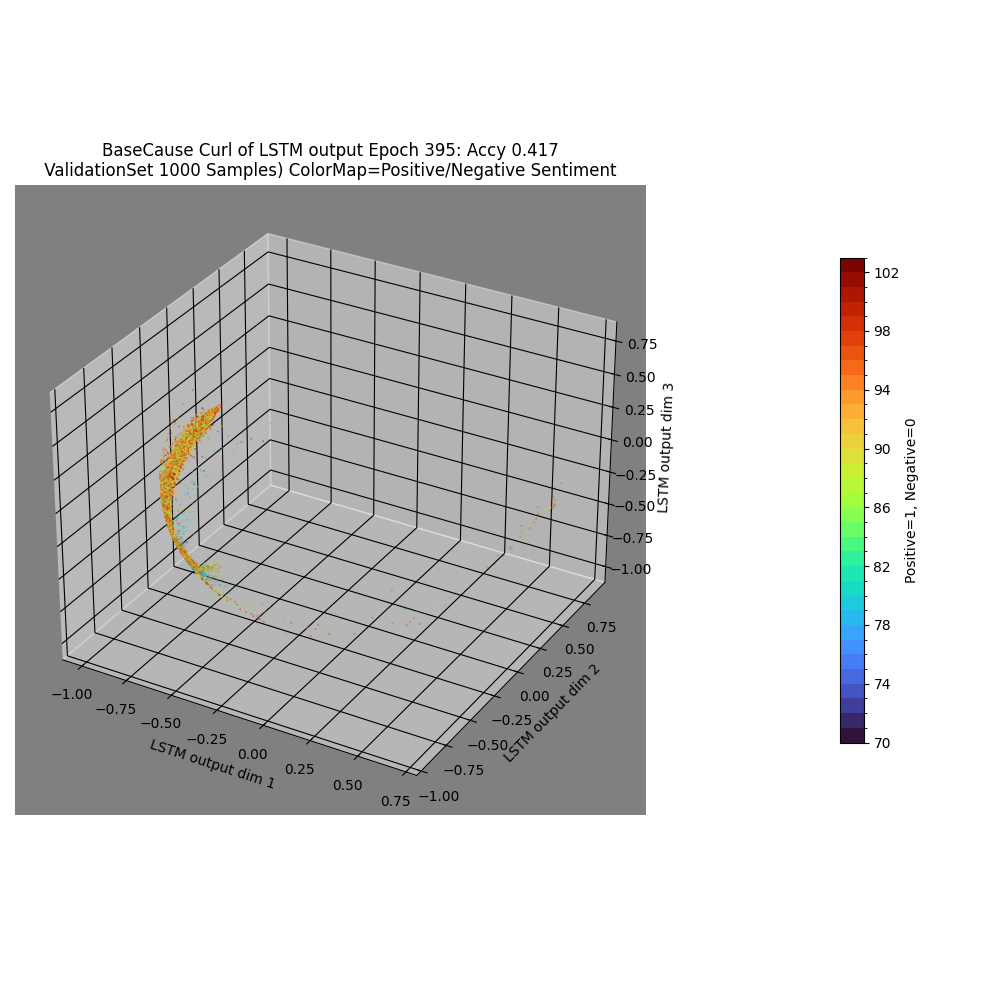

In [229]:
start,stop=5,175
plt.close('all')
plt.rcParams['grid.color'] = "black"
curlfig=plt.figure(figsize=(10,10))
curlax=curlfig.add_subplot(projection='3d')
#curlax2=curlfig.add_subplot(1,2,2,projection='3d')
for i in range(start,stop):
    keep=np.ceil((i/test1['length'])*100)
    keep=np.where(keep>=100,-1,keep).astype(int)
    p = [ int(k) for k in keep if(k!=-1)]
    keep=np.where(keep!=-1)[0]
    curlax.scatter(sample[keep,i:i+1,0], sample[keep,i:i+1,1], sample[keep,i:i+1,2],
                 s=0.05,c=nco[keep,i:i+1])
    #curlax2.scatter(sample[keep,i:i+1,0], sample[keep,i:i+1,1], sample[keep,i:i+1,2],
    #             s=1,c=nco2[keep,i:i+1])
    #curlax.quiver(sample[keep,i:i+1,0], sample[keep,i:i+1,1], sample[keep,i:i+1,2],
    #               sample_curl[keep,i:i+1,0],sample_curl[keep,i:i+1,1], sample_curl[keep,i:i+1,2] ,
    #             length=0.05, normalize=True,color=nco[keep,i:i+1])
    
    #curlax.scatter3D(sample[:,i:i+1,0], sample[:,i:i+1,1], sample[:,i:i+1,2],c=nco[:,i:i+1],s=5)
    curlax.set_xlabel('LSTM output dim 1')
    curlax.set_ylabel('LSTM output dim 2')
    curlax.set_zlabel('LSTM output dim 3')
    
    curlax.set_facecolor('gray')
sm = plt.cm.ScalarMappable(cmap=negcolormap, norm=norm)
cbar=curlfig.colorbar(sm,ax=curlax,shrink=0.5,pad=0.2)
cbar.set_label('Positive=1, Negative=0')
#curlax.view_init(elev=60, azim=-80)
curlax.set_title(f"BaseCause Curl of LSTM output Epoch {epoch}: Accy {accy.loc[epoch]['Accy']}\n ValidationSet 1000 Samples) ColorMap=Positive/Negative Sentiment ")
plt.tight_layout()
plt.show()

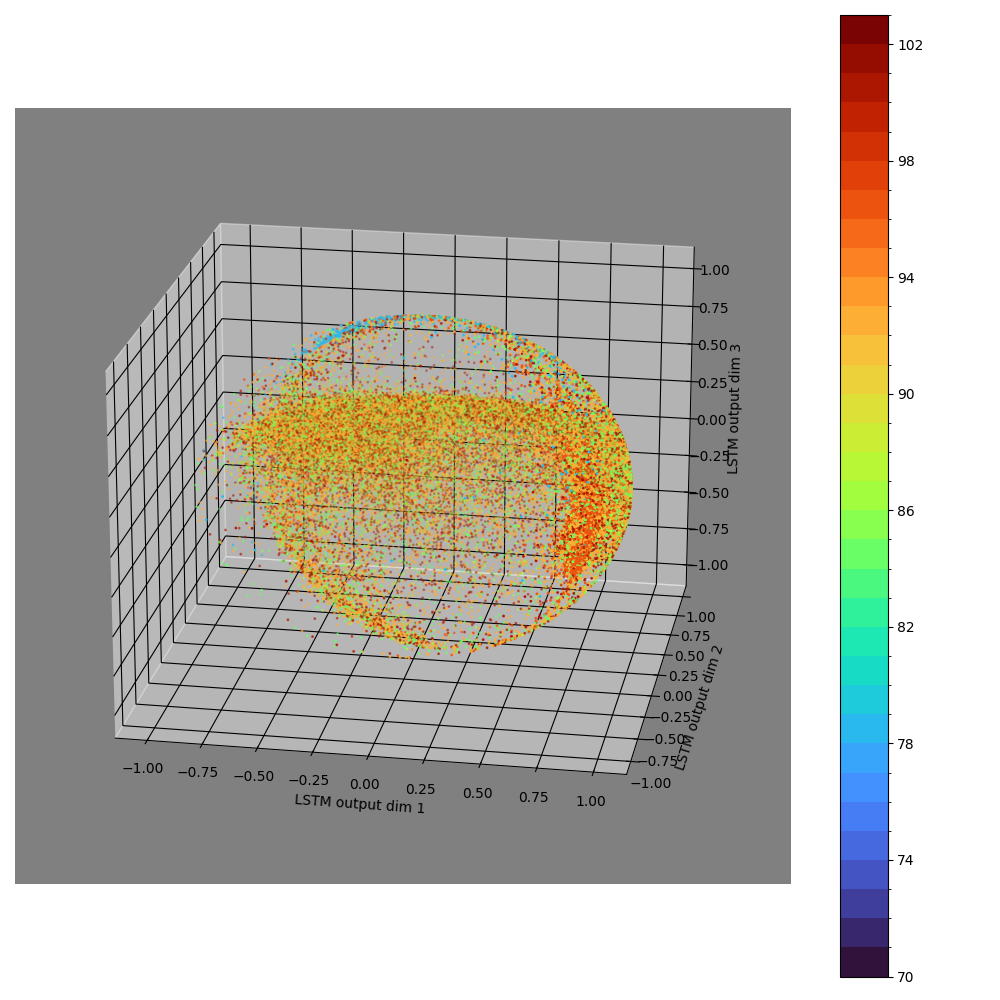

In [230]:
plt.close('all')
plt.rcParams['grid.color'] = "black"
divfig=plt.figure(figsize=(10,10))
curlax=divfig.add_subplot(projection='3d')
curlax.set_facecolor('gray')
for i in range(start,stop):
    keep=np.ceil(i/test1['length']*100)
    keep=np.where(keep>=100,-1,keep)
    p = [ int(k) for k in keep if(k!=-1)]
    keep=np.where(keep!=-1)[0]
    curlax.scatter3D(sample_curl[keep,i:i+1,0], sample_curl[keep,i:i+1,1],sample_curl[keep,i:i+1,2],s=1,c=nco[keep,i:i+1])
    curlax.set_xlabel('LSTM output dim 1')
    curlax.set_ylabel('LSTM output dim 2')
    curlax.set_zlabel('LSTM output dim 3')
#sm = plt.cm.ScalarMappable(cmap=cm.bwr, norm=norm)
#cbar=divfig.colorbar(sm,ax=curlax,shrink=0.5,pad=0.2)
sm = plt.cm.ScalarMappable(cmap=negcolormap, norm=norm)
cbar=plt.colorbar(sm,ax=curlax)
#cbar.set_label('Negative Tokens Relative Frequence')
#curlax.set_title(f"BaseCause Curl of LSTM output Epoch {epoch}: Accy 0.71\n ValidationSet 1000 Samples) ColorMap=Negative Sentiment Token Frequence")
curlax.view_init(elev=20, azim=-80)

plt.tight_layout()
plt.show()

In [ ]:
posaccounting={}
for t in list(negCount.keys()):
    doc=nlp(t)
    try:
        posaccounting[doc[0].pos_].append(negCount[t])
    except KeyError:
        posaccounting[doc[0].pos_]=[negCount[t]]

In [ ]:
with open('./posaccounting_negTextFreq.plk','wb') as f:
    pickle.dump(posaccounting,f)


In [ ]:
for pos_ in list(posaccounting.keys()):
    print(f'{pos_} : {np.mean(posaccounting[pos_])}')